# Brihan Ramirez

In [1]:
#Installing xboost
import sys
!{sys.executable} -m pip install xgboost

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Colormap
from matplotlib.colors import ListedColormap

# So that we can ignore warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

#Differentiate split and set
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  
from sklearn.linear_model import Lasso  
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from xgboost import plot_importance 

#save final model on disk
from sklearn.externals import joblib


In [3]:
np.set_printoptions(precision=2, suppress=True) # Precission set to 2

# Load BlackFriday from CSV

In [4]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df.shape

(537577, 12)

# Columns of the dataset

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Display the first 5 rows to see example observations.

In [7]:
pd.set_option('display.max_columns', 20) # Code to display maximun of 20 columns
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Some feaures are numeric and some are categorical
# Filtering the categorical features:

In [8]:
df.dtypes[df.dtypes=='object'] # variables whose datatype is object

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# Distributions of numeric features

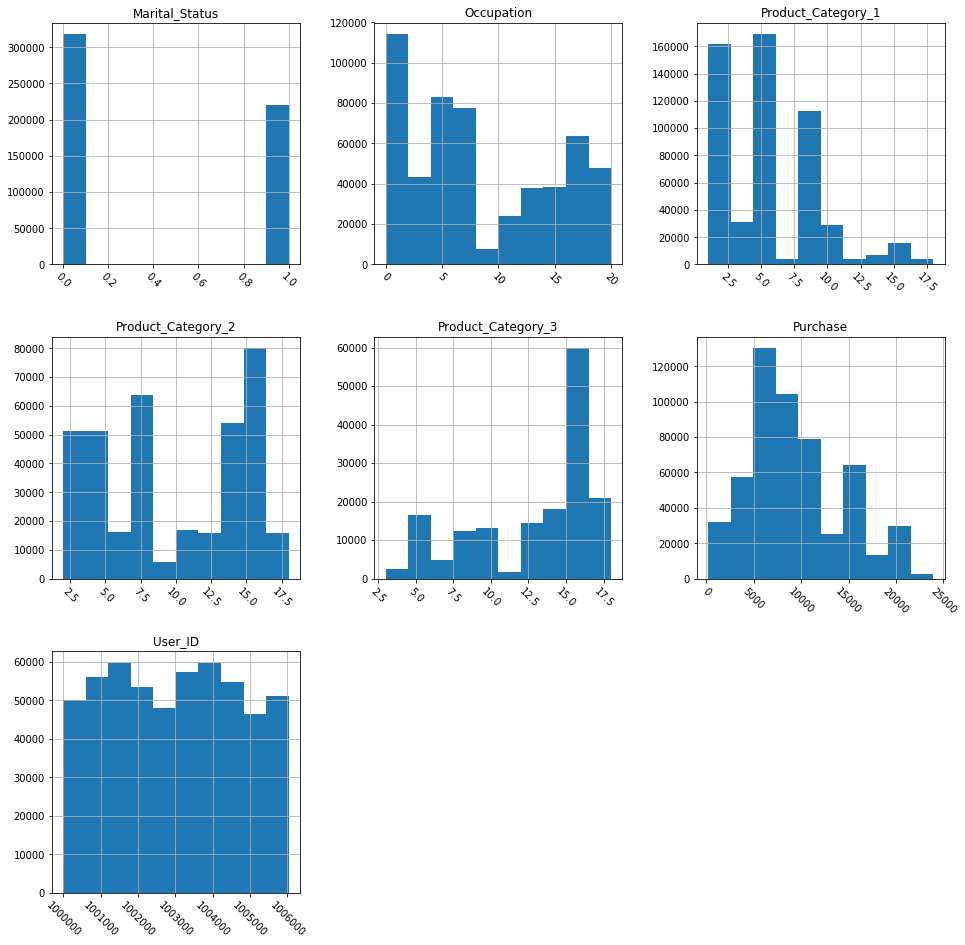

In [9]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# Observations: We can make out quite a few observations:

For example, consider the histogram for Marital_Status:


Unmarried persons buy goods on blackfriday for a total of 300.000
Married persons buy goods on blackfriday for a total of 225.000


Consider the histogram for Purchase:
between 5000 and 7000 persons purchase goods for a total of 120.000
20000 persons purchase goods for a total of 20.000


Consider the histogram for Occupation:
Occupation 1 spends between 100000 and 120000
Occupation 9 spends less than 20000

In [10]:
# describe statistics for df

In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Obeservation:

At least 537577 bought good on blackfriday, the min is 185, the maximum is 23961

# Distributions of categorical features

In [12]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


# Bar plots for categorical Features
Plot bar plot for the 'exterior_walls' feature.

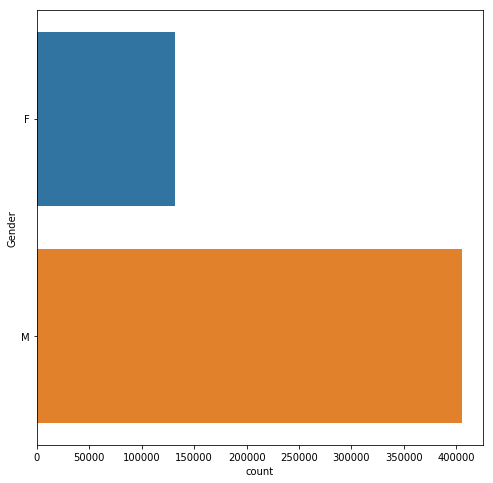

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(y='Gender', data=df)


# Observation
Male buy more than women on blackfriday

### Similarly Plot bar plot for the 'Age' feature.

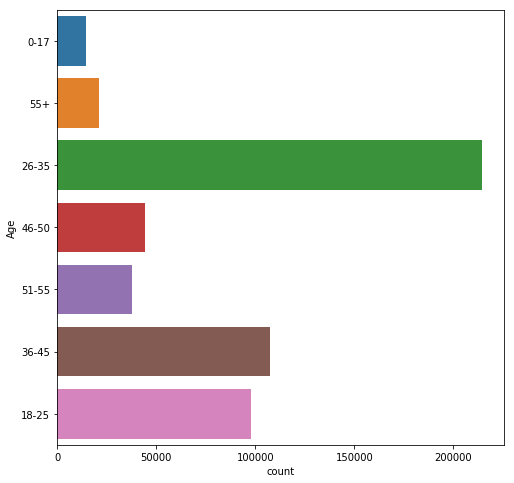

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(y='Age', data=df)

# Observations:

People whose age ranges between 26-25 are the most predispose to buy on blackfriday
people whose age ranges between 0-17 are the least predispose to buy on blackfriday
This data makes a lot of sense as people who are in their earnings prime like to buy a lot of goods while teens and 
people who are retire spend less on goods

# Segmentations
segmentation is the process of dividing a market of potential customers into groups, or segments, based on different characteristics.


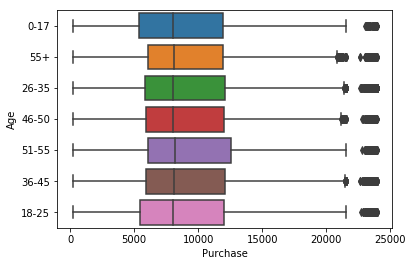

In [15]:
sns.boxplot(y='Age', x='Purchase', data=df)

In [16]:
#We have outliers for every single age range the absolute min is for the ages 0-17 while
#the absolute maximum is for the 51-55 age range

In [17]:
df.groupby('Age').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
0-17,1.002676e+06,8.790236,0.000000,4.936357,9.023027,11.850282,9020.126878
18-25,1.002766e+06,6.737141,0.211412,5.003359,9.474317,12.395286,9235.197575
26-35,1.003075e+06,7.902343,0.392035,5.217085,9.810403,12.648689,9314.588970
36-45,1.003030e+06,8.847152,0.395418,5.387613,9.954321,12.750717,9401.478758
46-50,1.003152e+06,8.526367,0.723038,5.629587,10.177195,12.937952,9284.872277
51-55,1.002950e+06,8.809506,0.717183,5.649662,10.280446,13.108187,9620.616620
55+,1.002951e+06,9.537961,0.634981,5.896570,10.462992,13.154686,9453.898579


# Observations :
People that are 55+ have the highest values for Product_Category_1, Product_Category_2 and Product_Category_3, It means that they buy less products, 
People betwee 51-55 spend the most on goods

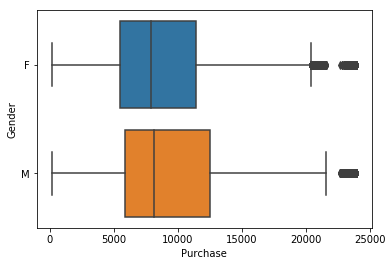

In [18]:
sns.boxplot(y='Gender', x='Purchase', data=df)

# Observations
In general according to the plot, males buy more goods on blackfriday than their counterpart female

# Segment by property_type and display the means and standard deviations within each class

In [19]:
df.groupby('Gender').agg([np.mean, np.std])

User_ID              Occupation           Marital_Status  \
                mean          std       mean       std           mean   
Gender                                                                  
F       1.003088e+06  1774.236455   6.742672  6.242116       0.417733   
M       1.002961e+06  1693.251916   8.519705  6.554518       0.405883   

                 Product_Category_1           Product_Category_2            \
             std               mean       std               mean       std   
Gender                                                                       
F       0.493188           5.595445  3.476495          10.007969  4.872295   
M       0.491063           5.197748  3.830816           9.789072  5.153046   

       Product_Category_3               Purchase               
                     mean       std         mean          std  
Gender                                                         
F               12.452318  4.126782  8809.761349  4721.440055  
M               12.732924  4.121502  9504.771713  5051.057256

# Correlations

In [20]:
# Finally, let's take a look at the relationships between numeric features and other numeric features.
# Correlation is a value between -1 and 1 that represents how closely values for two separate features.
# Positive correlation means that as one feature increases, the other increases.
# Negative correlation means that as one feature increases, the other decreases.
# Correlations near -1 or 1 indicate a strong relationship.
# Those closer to 0 indicate a weak relationship.
# 0 indicates no relationship.

In [21]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


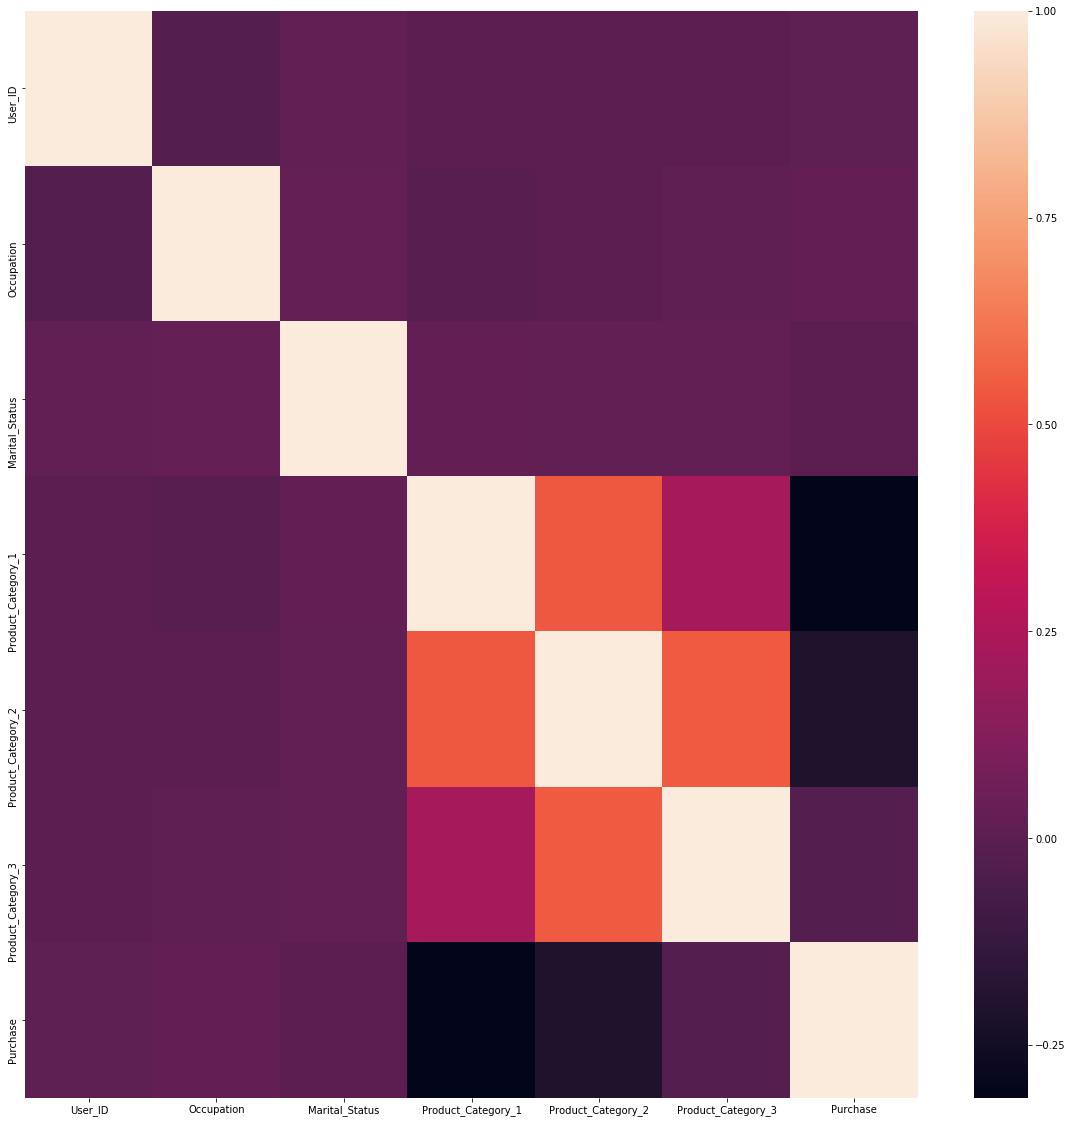

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

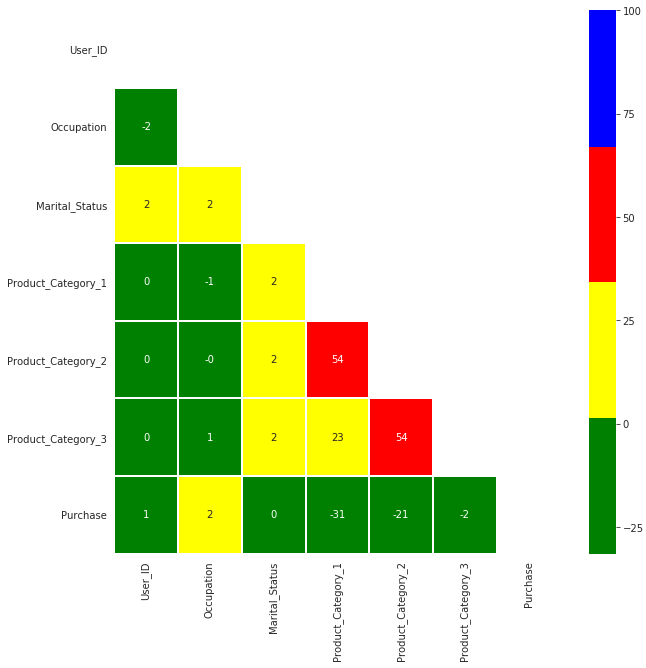

In [23]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

# Data Cleaning

In [24]:
# Dropping the duplicates

In [25]:
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


In [26]:
# Since we have the same 537577 variable, it means that we dont have duplicates in our data

# Fix structural errors

In [27]:
# In this data set there are not structional errors

# Typos and capitalization

In [28]:
# Data is huge to check every single variable for typos and capitalization

# Mislabeled classes

In [29]:
# There wasn't mislabeled classes

# Removing Outliers

# Outliers can cause problems with certain types of models.

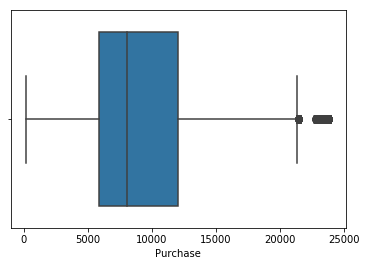

In [30]:
sns.boxplot(df.Purchase)

# Interpretation

In [31]:
# The two vertical bars on the ends are the min and max values. There were purchases ranging from 0 to ~22000
# The box in the middle is the interquartile range (25th percentile to 75th percentile).
# Finally, the vertical bar in the middle of the box is the median.

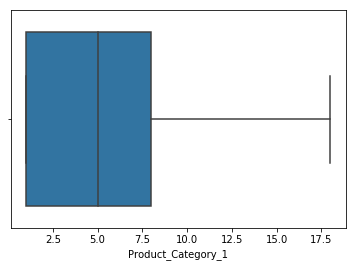

In [32]:
## Checking outliers in Product_catergory_1
sns.boxplot(df.Product_Category_1)

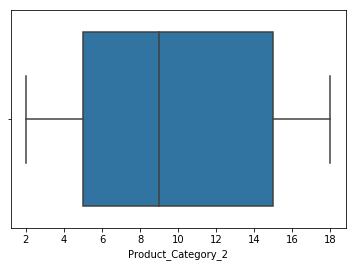

In [33]:
## Checking outliers in Product_Category_2
sns.boxplot(df.Product_Category_2)

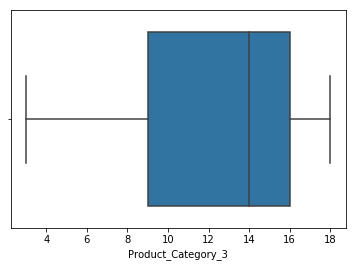

In [34]:
sns.boxplot(df.Product_Category_3)

# Label missing categorical data

In [35]:
# We cannot simply ignore missing values in your dataset. 

In [36]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

In [37]:
# According to the results there are no missing categorical data

# Flag and fill missing numeric data

In [38]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    166986
Product_Category_3    373299
Purchase                   0
dtype: int64

# Before we move on to the next module, let's save the new dataframe we worked hard to clean.

In [39]:
# Saving Cleaned file to desktop

In [40]:
# Save cleaned dataframe to new file
df.to_csv(r'C:\Users\Brihan Ramirez\Desktop\cleaneddf.csv', index=False)

# Feature Engineering

# Indicator variables

In [41]:
# This step is not necessary because there are not correlation is the graph that we did
# In our las step

# Interaction features

In [42]:
# This step is not necessary because there are not correlation is the graph that we did
# In our las step

# Handling Sparse Classes

In [43]:
# This step is not necessary because there are not correlation is the graph that we did
# In our las step

# Encode dummy variables (One Hot Encoding)

In [44]:
# Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
# Therefore, we need to create dummy variables for our categorical features.
# Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.

In [45]:
# Create a new dataframe with dummy variables for for our categorical features.
df = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'])

In [46]:
# Note: There are many ways to perform one-hot encoding, 
# you can also use LabelEncoder and OneHotEncoder classes in SKLEARN or use the above pandas function.

In [47]:
df.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,NaN,NaN,8370,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.0,14.0,15200,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,NaN,NaN,1422,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.0,NaN,1057,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,NaN,NaN,7969,0,1,...,0,1,0,0,1,0,0,0,0,1


# Remove unused or redundant features

In [48]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['User_ID'], axis=1)  ## axis=1 because we are dropping columns.
df = df.drop(['Product_ID'], axis=1)  ## axis=1 because we are dropping columns.

In [49]:
# This columns are what is known as garbage data
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,NaN,NaN,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,NaN,NaN,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,NaN,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,NaN,NaN,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [50]:
df = df.fillna(0)

In [51]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [52]:
# Save analytical base table
df.to_csv(r'C:\Users\BrihanRamirez\Desktop\CleanAnalyticaldf.csv', index=None)

# Machine Learning Models

# Data Preparation

In [53]:
df = pd.read_csv('CleanAnalyticaldf.csv')

In [54]:
df.shape

(537577, 23)

In [55]:
df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,0.0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,14.0,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,0.0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,0.0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,0.0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


# Train and Test Splits

In [57]:
#Our data is massive, my machine can't run that amount of information, 
#that's the reason of why we're adding the next line of code
#so we can fraction the data to 0.02
df = df.sample(frac=0.02,random_state=100)
# The next line of code is wrong:
# sample_df = df.sample(n=50,random_state=100)
y = df.Purchase
# Object for input features
X = df.drop(['Purchase'], axis=1)

In [58]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [59]:
# Let's oberve and analyze the results

In [60]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(172, 22) (43, 22) (172,) (43,)


# Data standardization

In [61]:
train_mean = X_train.mean()
train_std = X_train.std()

In [62]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [63]:
## Check for mean and std dev.
X_train.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,...,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.720000e+02
mean,1.161861e-17,3.679227e-17,1.086018e-16,1.807340e-17,3.356488e-17,-5.422019e-17,-2.840105e-17,7.874838e-17,1.181226e-16,8.520316e-17,...,6.261141e-17,-1.132815e-16,1.265138e-16,1.032766e-17,5.034732e-17,-7.552098e-17,-5.422019e-17,-1.536239e-16,-2.388270e-17,5.228376e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.227125e+00,-9.407097e-01,-1.204438e+00,-1.050234e+00,-6.370016e-01,-6.383207e-01,-1.557502e+00,-1.895638e-01,-5.399336e-01,-7.771389e-01,...,-2.851064e-01,-1.328468e-01,-6.836318e-01,-9.517426e-01,-5.039733e-01,-3.818559e-01,-7.675593e-01,-4.949186e-01,-4.949186e-01,-3.408864e-01
25%,-7.594761e-01,-9.407097e-01,-9.367849e-01,-1.050234e+00,-6.370016e-01,-6.383207e-01,-1.557502e+00,-1.895638e-01,-5.399336e-01,-7.771389e-01,...,-2.851064e-01,-1.328468e-01,-6.836318e-01,-9.517426e-01,-5.039733e-01,-3.818559e-01,-7.675593e-01,-4.949186e-01,-4.949186e-01,-3.408864e-01
50%,-2.918273e-01,-9.407097e-01,-1.338264e-01,-2.459587e-01,-6.370016e-01,-6.383207e-01,6.383207e-01,-1.895638e-01,-5.399336e-01,-7.771389e-01,...,-2.851064e-01,-1.328468e-01,-6.836318e-01,-9.517426e-01,-5.039733e-01,-3.818559e-01,-7.675593e-01,-4.949186e-01,-4.949186e-01,-3.408864e-01
75%,9.552360e-01,1.056847e+00,6.691321e-01,1.201738e+00,6.730061e-01,1.557502e+00,6.383207e-01,-1.895638e-01,-5.399336e-01,1.279290e+00,...,-2.851064e-01,-1.328468e-01,1.454271e+00,1.044596e+00,-5.039733e-01,-3.818559e-01,1.295256e+00,-4.949186e-01,-4.949186e-01,-3.408864e-01
max,1.890534e+00,1.056847e+00,3.345660e+00,1.684303e+00,2.221197e+00,1.557502e+00,6.383207e-01,5.244599e+00,1.841312e+00,1.279290e+00,...,3.487070e+00,7.483703e+00,1.454271e+00,1.044596e+00,1.972696e+00,2.603563e+00,1.295256e+00,2.008787e+00,2.008787e+00,2.916473e+00


In [64]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [65]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.099693,-0.150978,0.059133,-0.010287,0.116322,-0.280861,0.280861,0.063188,-0.152289,-0.059780,...,0.065794,0.221411,0.062148,-0.023213,-0.043198,-0.173571,0.143917,-0.029113,-0.087339,0.113629
std,1.089255,0.988215,1.102518,1.080959,1.085892,0.820236,0.820236,1.157926,0.889499,0.991698,...,1.108653,1.622955,1.030988,1.007521,0.975187,0.769550,1.036535,0.985833,0.935243,1.142045
min,-1.227125,-0.940710,-1.204438,-1.050234,-0.637002,-0.638321,-1.557502,-0.189564,-0.539934,-0.777139,...,-0.285106,-0.132847,-0.683632,-0.951743,-0.503973,-0.381856,-0.767559,-0.494919,-0.494919,-0.340886
25%,-0.915359,-0.940710,-0.936785,-1.050234,-0.637002,-0.638321,0.638321,-0.189564,-0.539934,-0.777139,...,-0.285106,-0.132847,-0.683632,-0.951743,-0.503973,-0.381856,-0.767559,-0.494919,-0.494919,-0.340886
50%,-0.135944,-0.940710,-0.133826,-0.406814,-0.637002,-0.638321,0.638321,-0.189564,-0.539934,-0.777139,...,-0.285106,-0.132847,-0.683632,-0.951743,-0.503973,-0.381856,-0.767559,-0.494919,-0.494919,-0.340886
75%,0.955236,1.056847,0.669132,1.201738,1.268464,-0.638321,0.638321,-0.189564,-0.539934,1.279290,...,-0.285106,-0.132847,1.454271,1.044596,-0.503973,-0.381856,1.295256,-0.494919,-0.494919,-0.340886
max,1.890534,1.056847,3.345660,1.684303,1.903619,1.557502,0.638321,5.244599,1.841312,1.279290,...,3.487070,7.483703,1.454271,1.044596,1.972696,2.603563,1.295256,2.008787,2.008787,2.916473


# Model 1 - Baseline Model

In [66]:
# In this model, for every test data point, we will simply predict the average of the train labels as the output.
# We will use this simple model to perform hypothesis testing for other complex models.

In [67]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [68]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [69]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  4297.152046332818
R-squared:  0.0
Mean Absolute Error:  3296.6511627906975


In [70]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  4761.7948736379485
R-squared:  -0.012330596727182508
Mean Absolute Error:  3461.0232558139537


# Model-2 Ridge Regression

In [71]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [72]:
model.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [74]:
## Predict Test results
y_pred = model.predict(X_test)

In [75]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  3857.4787317214605
R-squared:  0.19416590362611552
Mean Absolute Error:  2902.7099354064053


In [76]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  4672.6383227944625
R-squared:  0.025222872984959954
Mean Absolute Error:  3496.1738763684757


# Feature Importance

In [77]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Age_0-17
City_Category_A
Age_46-50
City_Category_C
Marital_Status
Stay_In_Current_City_Years_1
Stay_In_Current_City_Years_2
Occupation
Product_Category_3
Stay_In_Current_City_Years_3
Age_55+
Gender_M
Gender_F
Stay_In_Current_City_Years_0
Product_Category_2
Stay_In_Current_City_Years_4+
City_Category_B
Age_51-55
Age_18-25
Age_26-35
Age_36-45


# Model-3 Support Vector Regression

In [79]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 20 minutes

/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [80]:
model.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [81]:
## Building the model again with the best hyperparameters
model = SVR(C=100000, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [82]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [83]:
## Predict Test results
y_pred = model.predict(X_test)

In [84]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Support Vector Regression:
*******************************
Root mean squared error:  2676.2351566812854
R-squared:  0.612129185742221
Mean Absolute Error:  1413.4007340820065


In [85]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  5529.736774645903
R-squared:  -0.36517999028798664
Mean Absolute Error:  3911.2061487121305


# Model-4 Random Forest Regression

In [86]:
## Reference for random search on random forest
## https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)
## This takes around 15 minutes

/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [87]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [89]:
## Predict Test results
y_pred = model.predict(X_test)

In [90]:
print("Train Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Random Forest Regression:
*******************************
Root mean squared error:  2428.080721617684
R-squared:  0.6807250832576826
Mean Absolute Error:  1777.6731427817613


In [91]:
print("Test Results for Random Forest Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Regression:
*******************************
Root mean squared error:  4058.96224825677
R-squared:  0.26445199656341845
Mean Absolute Error:  2944.845319109755


# Feature Importance

In [92]:
## Building the model again with the best hyperparameters
model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [93]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_2
Occupation
Product_Category_3
Stay_In_Current_City_Years_2
City_Category_A
Marital_Status
Stay_In_Current_City_Years_1
Gender_M
Age_26-35
Age_36-45
Gender_F
Stay_In_Current_City_Years_4+
Age_18-25
City_Category_B
City_Category_C
Age_46-50
Age_0-17
Stay_In_Current_City_Years_0
Age_51-55
Stay_In_Current_City_Years_3
Age_55+


# Model-5 XGBoost Regression

In [124]:
## Reference for random search on xgboost
## https://gist.github.com/wrwr/3f6b66bf4ee01bf48be965f60d14454d
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

[21:12:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [125]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=100.0, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [126]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [127]:
## Predict Test results
y_pred = model.predict(X_test)

In [128]:
print("Train Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
*******************************
Root mean squared error:  3537.7848704438566
R-squared:  0.32220025768160154
Mean Absolute Error:  2565.7968551280887


In [129]:
print("Test Results for XGBoost Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for XGBoost Regression:
*******************************
Root mean squared error:  4495.483185973572
R-squared:  0.097735745103537
Mean Absolute Error:  3192.3946902252906


# Feature Importance

In [130]:
## Building the model again with the best hyperparameters
model = XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=400, reg_lambda=0.1)
model.fit(X_train, y_train)

[21:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [131]:
## Function to include figsize parameter
## Reference: https://stackoverflow.com/questions/40081888/xgboost-plot-importance-figure-size
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

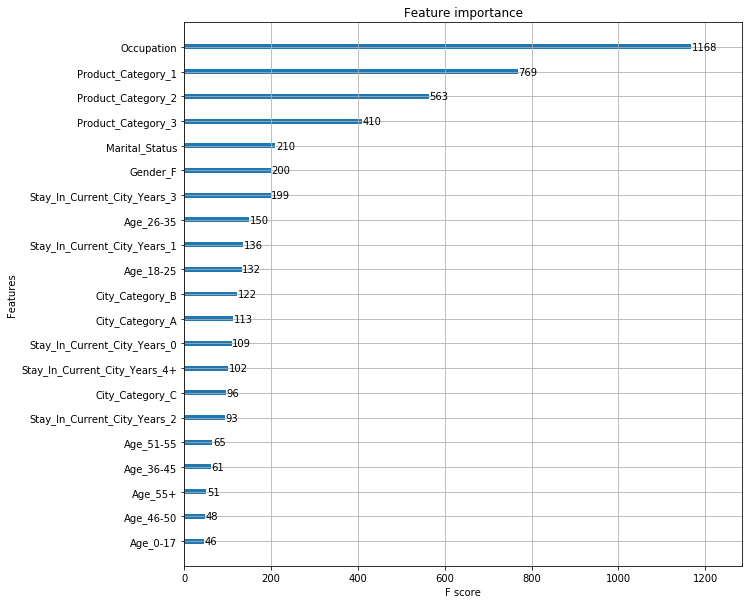

In [132]:
my_plot_importance(model, (10,10))

# Model-6 Lasso Regression

In [102]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [103]:
model.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [105]:
## Predict Test results
y_pred = model.predict(X_test)

In [106]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
*******************************
Root mean squared error:  3810.1623829927553
R-squared:  0.21381359647271203
Mean Absolute Error:  2850.7384018916478


In [107]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Lasso Regression:
*******************************
Root mean squared error:  4762.733735120097
R-squared:  -0.01272982933861777
Mean Absolute Error:  3571.674005330777


# Feature Importance

In [108]:
## Building the model again with the best hyperparameters
model = Lasso(alpha=1000)
model.fit(X_train, y_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Occupation
Stay_In_Current_City_Years_2
Stay_In_Current_City_Years_1
Stay_In_Current_City_Years_0
City_Category_C
City_Category_B
City_Category_A
Age_55+
Age_51-55
Age_46-50
Age_36-45
Age_26-35
Age_18-25
Age_0-17
Gender_M
Gender_F
Product_Category_3
Product_Category_2
Marital_Status
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_4+


# Model-7 Descision Tree Regression

In [110]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

/Users/BrianRamirez/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [111]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [113]:
## Predict Test results
y_pred = model.predict(X_test)

In [114]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Decision Tree Regression:
*******************************
Root mean squared error:  3554.7870434293077
R-squared:  0.31566975311894396
Mean Absolute Error:  2576.61707414033


In [115]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Decision Tree Regression:
*******************************
Root mean squared error:  4423.100381628723
R-squared:  0.12655696029206276
Mean Absolute Error:  3121.4160206718343


# Model-8 KN Regression

In [140]:
# This model wasn't functioning, because we need it to implement this code
# In order for our KNN regression to work:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []


# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 35.


In [141]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=35, p=2,
          weights='uniform')

In [142]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [143]:
## Predict Test results
y_pred = model.predict(X_test)

In [144]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
*******************************
Root mean squared error:  4066.697031388838
R-squared:  0.1043832728280929
Mean Absolute Error:  3108.8162790697675


In [145]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for KN Regression:
*******************************
Root mean squared error:  4662.471744420313
R-squared:  0.029460036780754262
Mean Absolute Error:  3414.693023255814


# Compare all models

In [146]:
#                    RSE            R-Square                MAE 
#                 Test Train     Test   Train            Test Train
# Base Line M.    4297 4761      0      -0.0123          3296 3461
# Ridge R.        3587 4672      0.1941 0.0252           2902 3496
# Support V.R.    2676 5529      0.6121 -0.3651          1413 3911
# Random F.R.     2428 4058      0.6807 0.2644           1777 2944
# Xgboost         3537 4495      0.3222 0.0977           2565 3192   
# Lasso R.        3810 4762      0.2138 -0.0127          2850 3571
# Decission T.    3554 4423      0.3156 0.1265           2576 3121
# KN Regression   4066 4662      0.1043 0.029            3108 3414

# Solving by Inspection
# The model with the value of R-Square that is closest to 1 in the test section is Random F.R. with a value of 0.6807 followed by Support V.R.
# with a value of 0.6121
# The model with the value of R-Square that is closest to 1 or -1 in the train section is Support V.R. with a value of -0.3651 followed by Random F.R. with a value of 0.2644
# By inspection, overall according to the results the most fitted model to predict the purchases on blackfriday based in comparison of:
# *R-Square closest to 1 or -1
# *RSE and MAE with the highest values
# The winner is Support Vector Regression


# Save the winning model to disk

In [147]:
win_model = RandomForestRegressor(n_estimators=200, min_samples_split=10, min_samples_leaf=2)
win_model.fit(X_train, y_train)
with open('rfr_real_estate.pkl', 'wb') as pickle_file:
       joblib.dump(win_model, 'rfr_real_estate.pkl')